In [1]:
# some imports specific for the notebook
import warnings
warnings.filterwarnings('ignore')
import sys
sys.path.append("../wind_structure/")

In [2]:
# some other module imports
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import wind_structure as ws

# Wind Structure Calculator

This Python module provides a number of simple calculators with which the structure of line-driven winds can be determined following different analytic approaches. In the following, we briefly demonstrate the usage of these calculators at the example of the well-studies O-star zeta-Puppis.

## Setting the stellar Parameters

These parameters describe the basic properties of the star. These are adopted from Noebauer & Sim 2015, tables 2 and 3.

In [3]:
mstar = 52.5  # mass; if no astropy units are provided, the calculators will assume units of solar masses
lstar = 1e6  # luminosity; if no astropy units are provided, the calculators will assume units of solar luminosities
teff = 4.2e4  # effective temperature; if no astropy units are provided, the calculators will assume kelvin
sigma = 0.3  # reference electron scattering cross section; if no astropy untis are provided, cm^2/g is assumed
gamma = 0.502  # Eddington factor with respect to electron scattering

CAK force multiplier paramters. Again these are adopted from Noebauer & Sim 2015, table 3

In [4]:
alpha = 0.595
k = 0.381

The grid for dimensional radii (i.e. r/Rstar) for which the wind velocity and density will be later determined

In [5]:
x = np.logspace(-3, 3, 1024) + 1.

## Setting up the calculators

* ``WindStructureCak75``: wind structure based on the seminal work by Castor, Abbott and Klein 1975; the central star is assumed to be a point source
* ``WindStructureFa86``: wind structure based on fits to the numerical results obtained by Friend and Abbott 1986; only the influence of the finite extent of the central star is taken into account
* ``WindStructureKppa89``: wind structure based on the approximate analytic description by Kudritzki, Pauldrach, Puls and Abbbott 1989; the finite extent of the central star is taken into account

__Note__: in all wind structure calculators it is assumed that the ionization state is frozen-in, i.e. constant throughout the wind.

In [6]:
wind_cak75 = ws.WindStructureCak75(mstar=mstar, lstar=lstar, teff=teff, gamma=gamma, sigma=sigma, k=k, alpha=alpha)
wind_fa86 = ws.WindStructureFa86(mstar=mstar, lstar=lstar, teff=teff, gamma=gamma, sigma=sigma, k=k, alpha=alpha)
wind_kppa89 = ws.WindStructureKppa89(mstar=mstar, lstar=lstar, teff=teff, gamma=gamma, sigma=sigma, k=k, alpha=alpha)

In [7]:
winds = [wind_cak75, wind_fa86, wind_kppa89]
labels = ["CAK75", "FA86", "KPPA89"]
linestyles = ["solid", "dashed", "dashdot"]

## Calculating the mass-loss rates

In [8]:
print("       | vterm [km/s] | Mdot [solMass/yr] ")
print("==========================================")
for wind, label in zip(winds, labels):
    print("{:6s} | {:7.2f}      | {:.4e}".format(label, wind.vterm.value, wind.mdot.value))

       | vterm [km/s] | Mdot [solMass/yr] 
CAK75  |  880.86      | 4.4606e-05
FA86   | 2203.62      | 2.4544e-05
KPPA89 | 2359.94      | 2.0353e-05


## Determining and visualizing the wind structure

Let's first have a look at the wind velocity in absolute terms as predicted by the different descriptions of the wind structure.

(0.8, 10.0)

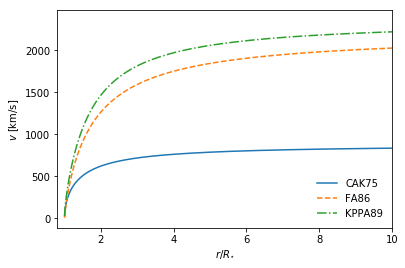

In [9]:
plt.figure()
for wind, label, ls in zip(winds, labels, linestyles):
    plt.plot(x, wind.v(x), ls=ls, label=label)
plt.legend(frameon=False, loc="lower right")
plt.xlabel(r"$r/R_{\star}$")
plt.ylabel(r"$v$ [km/s]")
plt.xlim([0.8, 1e1])

The following illustration compares how fast the terminal wind speed is reached in the various wind descriptions

Text(0,0.5,'$v/v_{\\infty}$')

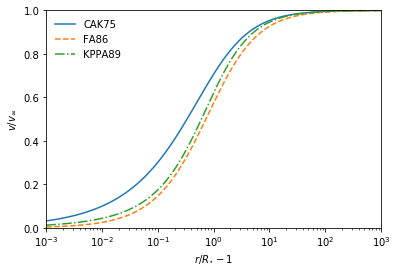

In [10]:
plt.figure()
for wind, label, ls in zip(winds, labels, linestyles):
    plt.plot(x - 1., wind.v(x) / wind.vterm, ls=ls, label=label)
plt.xscale("log")
plt.xlim([1e-3, 1e3])
plt.ylim([0, 1])
plt.legend(loc="upper left", frameon=False)
plt.xlabel(r"$r/R_{\star} - 1$")
plt.ylabel(r"$v/v_{\infty}$")

Finally, we have a look at the predicted wind density:

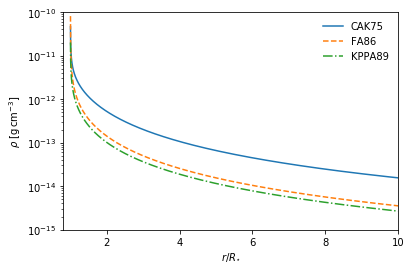

In [11]:
plt.figure()
for wind, label, ls in zip(winds, labels, linestyles):
    plt.plot(x, wind.rho(x), ls=ls, label=label)
plt.yscale("log")
plt.ylim([1e-15, 1e-10])
plt.xlim([0.8, 10])
plt.xlabel(r"$r/R_{\star}$")
plt.ylabel(r"$\rho$ $[\mathrm{g\,cm^{-3}}]$")
plt.legend(loc="upper right", frameon=False)